In [1]:
#https://www.youtube.com/watch?v=Lsue2gEM9D0&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=34
#https://github.com/StatQuest/pca_demo/blob/master/pca_demo.py
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...

genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  665  734  694  664  702  678  700  681  673  759
gene2  866  881  875  895  942  861  868  885  785  828
gene3  666  608  641  659  668  639  591  609  653  663
gene4  588  579  611  622  636  792  821  792  768  813
gene5  878  976  971  896  943  960  968  879  971  978
(100, 10)


In [7]:
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
pca = PCA() #creates pca object
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data) #extracts cordinates

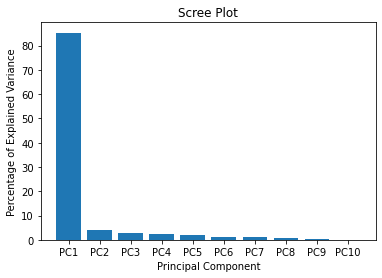

In [12]:
# Draw a scree plot and a PCA plot
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

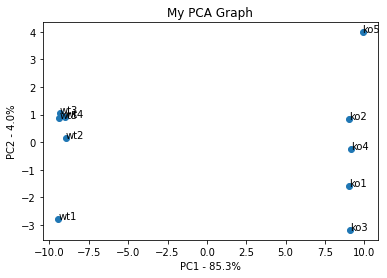

In [17]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [20]:
# Determine which genes had the biggest influence on PC1

## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)

## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene7    -0.108190
gene39   -0.108185
gene16   -0.108184
gene25    0.108179
gene89    0.108176
gene38   -0.108163
gene69   -0.108161
gene9     0.108139
gene72    0.108118
gene37    0.108115
dtype: float64
